[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Classification with Scikit-learn </h1></center>
<center><h3><a href = 'http://introml.analyticsdojo.com'>introml.analyticsdojo.com</a></h3></center>



# Classification with Scikit-learn

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Intro to Classification

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data in on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.


First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

First 5 samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels: [1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

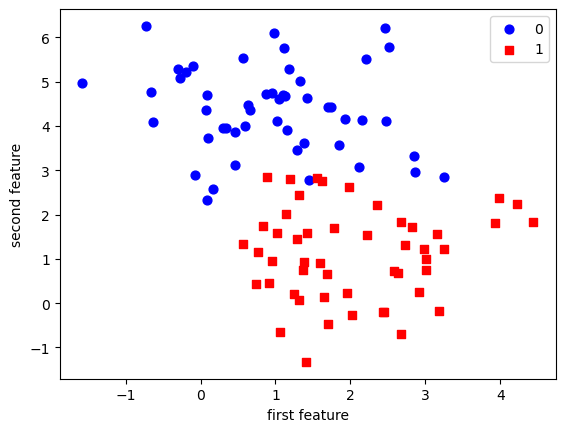

In [16]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

In [17]:
#Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [19]:
X_train.shape

(75, 2)

In [20]:
y_train.shape

(75,)

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [21]:
classifier.fit(X_train, y_train)

LogisticRegression()

(Some estimator methods such as `fit` return `self` by default. Thus, after executing the code snippet above, you will see the default parameters of this particular instance of `LogisticRegression`. Another way of retrieving the estimator's ininitialization parameters is to execute `classifier.get_params()`, which returns a parameter dictionary.)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [22]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [23]:
print(prediction)
print(y_test)

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [24]:
np.mean(prediction == y_test)

0.84

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [25]:
classifier.score(X_test, y_test)

0.84

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [26]:
classifier.score(X_train, y_train)

0.9733333333333334

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [27]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 0.87015709 -2.23877721]]
[4.64737766]
